In [1]:
import sys, os 
from os.path import dirname,join
path = dirname(dirname(os.getcwd()))
sys.path.insert(0, path)
sys.path.insert(0, join(path, 'src/io'))
sys.path.append('/work/mflora/ROAD_SURFACE')
sys.path.insert(0, '/home/monte.flora/python_packages/scikit-explain')

In [2]:
import skexplain 
from skexplain.common.importance_utils import to_skexplain_importance
from src.io.io import load_data_and_model
from src.common.util import subsampler, normalize_importance, compute_sage

import pickle
import shap
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import matplotlib

import numpy as np
from probsr_config import PREDICTOR_COLUMNS, FIGURE_MAPPINGS, COLOR_DICT
from display_names import display_feature_names

In [3]:
# Constants. 
RESULTS_PATH = os.path.join(path, 'results')
BASE_PATH = '/work/mflora/explainability_work/'
DATA_BASE_PATH = os.path.join(BASE_PATH, 'datasets')
MODEL_BASE_PATH = os.path.join(BASE_PATH, 'models')

In [4]:
# Load the Data and Model 
dataset = 'tornado'
option = 'original'
model, X, y = load_data_and_model(dataset, option, DATA_BASE_PATH, MODEL_BASE_PATH)
if dataset != 'road_surface':
    vs = [v for v in list(X.columns) if 'time' in v]
    X = X[vs]

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


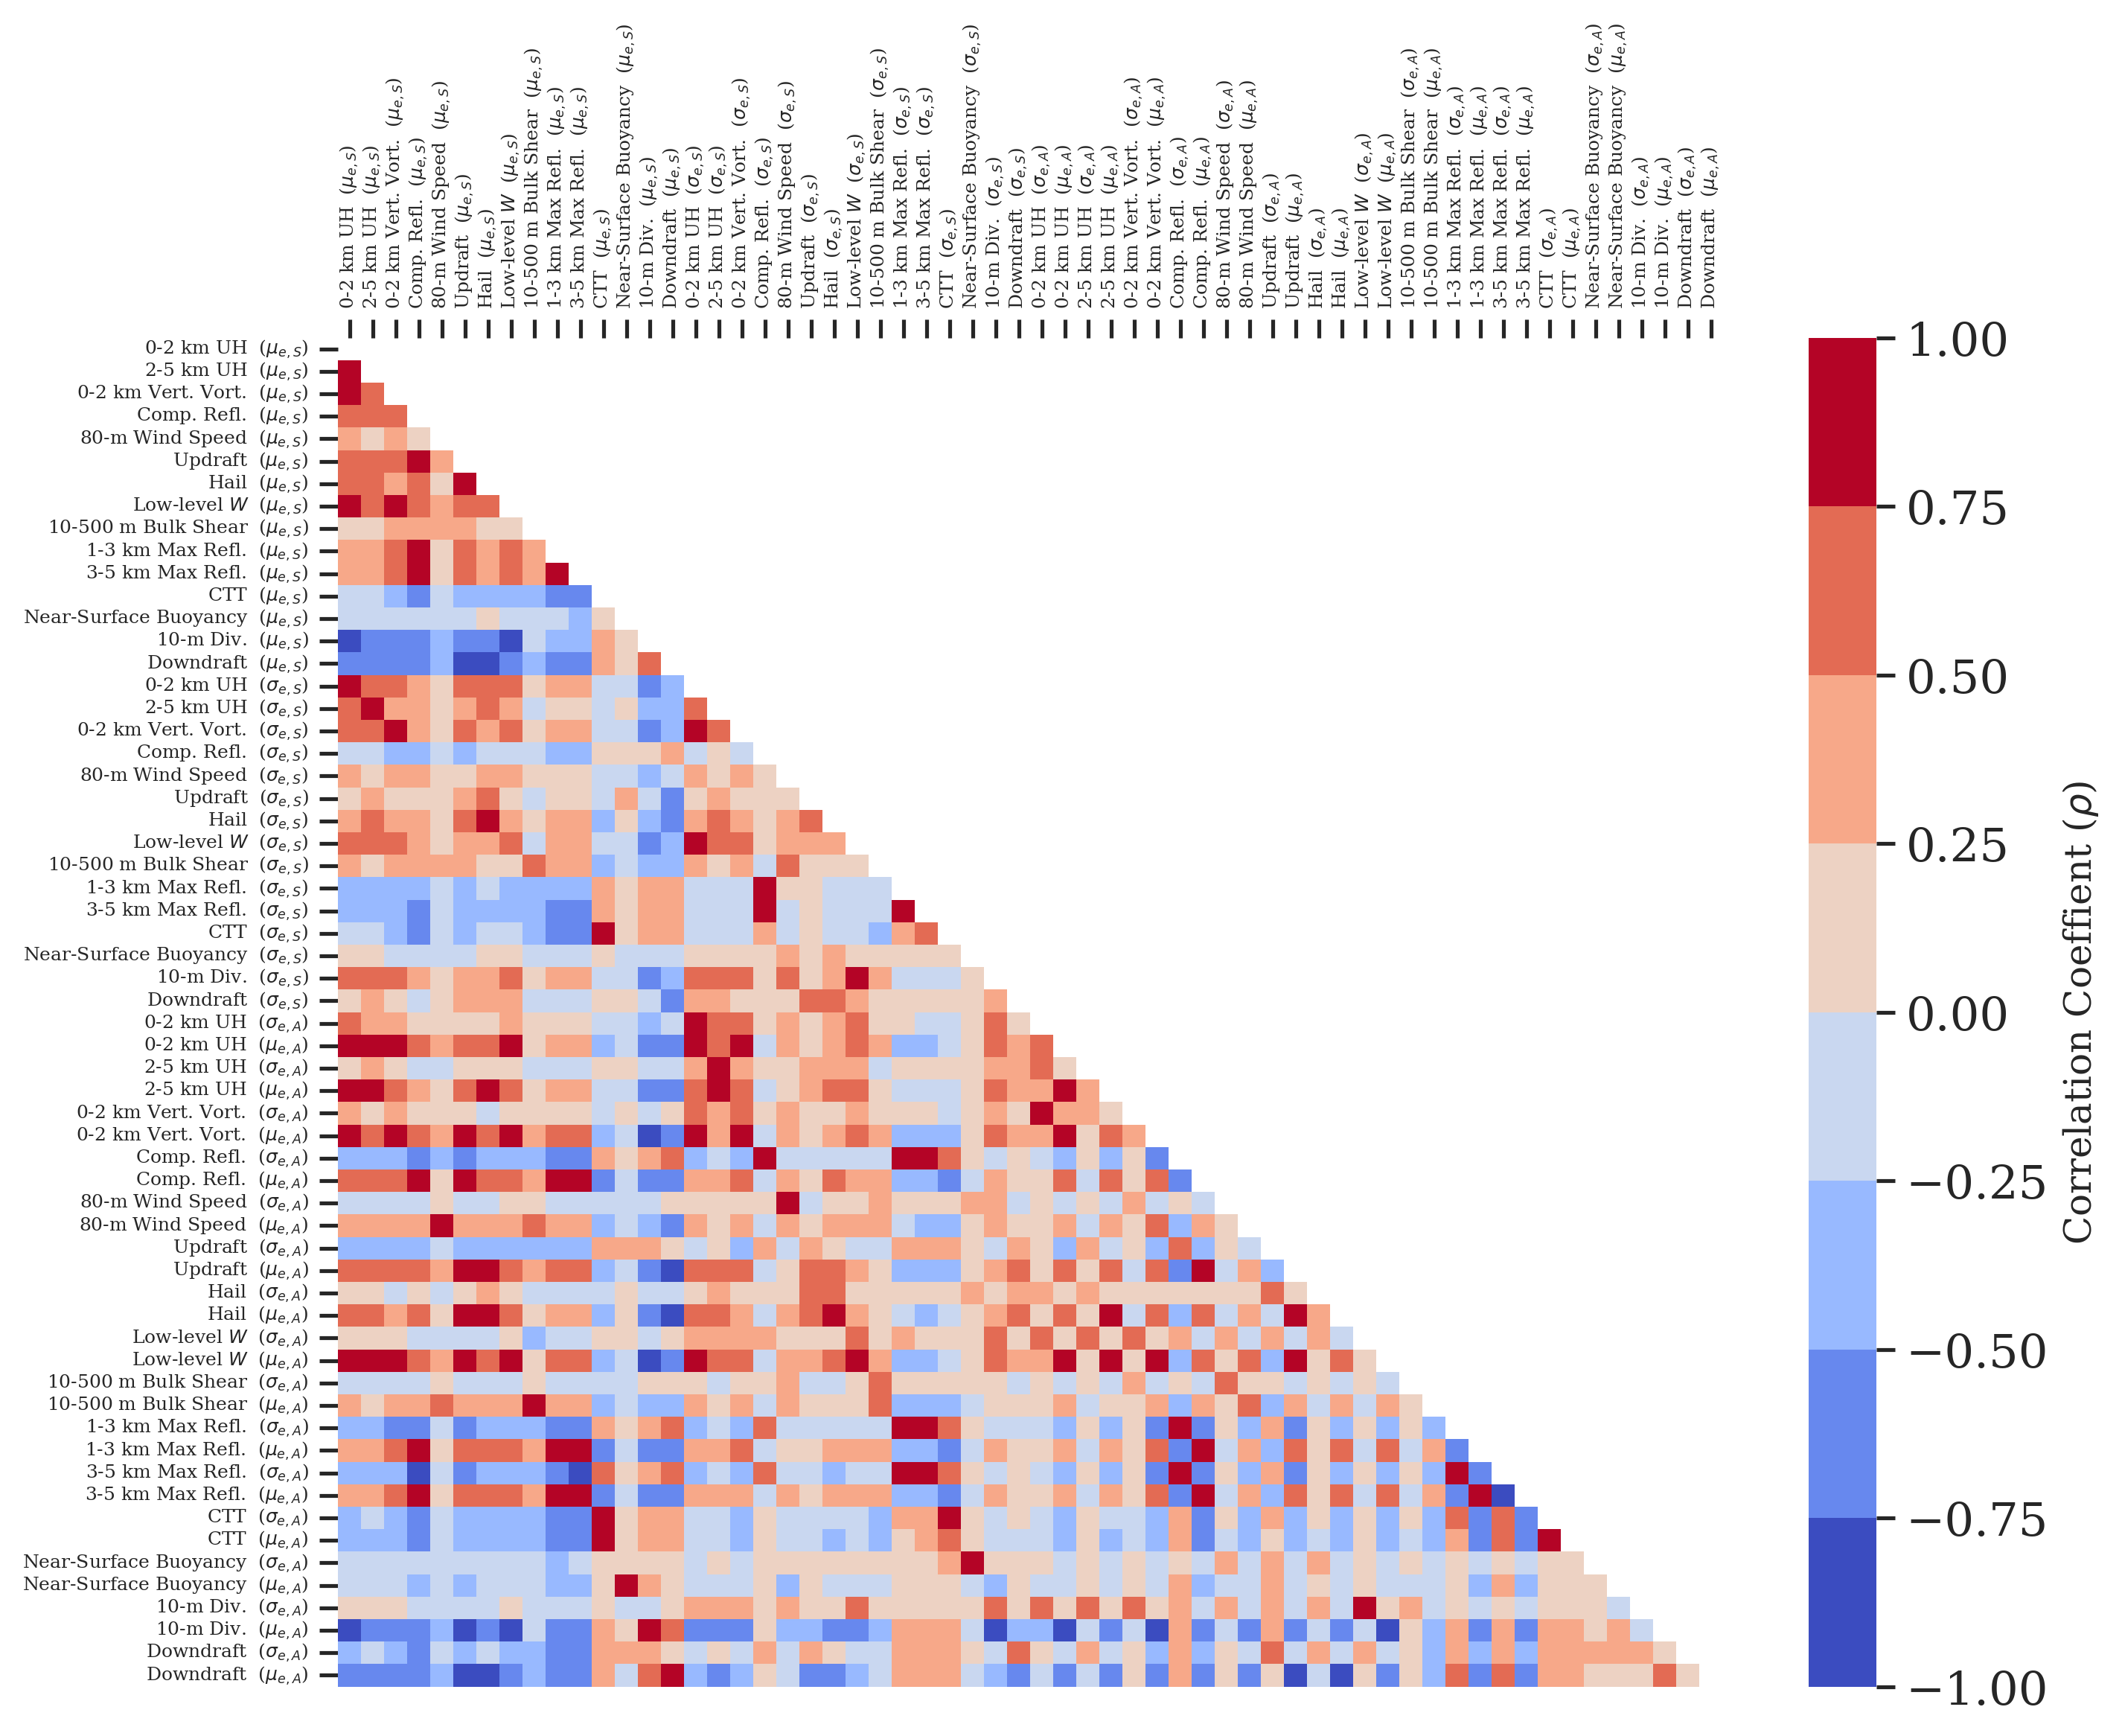

In [16]:
f, ax = plt.subplots(dpi=300, figsize=(10,8))
ax.tick_params(axis='x', labelrotation = 90)

levels = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.00]
cmap = matplotlib.cm.coolwarm
norm = norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
mappable = matplotlib.cm.ScalarMappable(norm, cmap='coolwarm')

#cbar_kws = {'mappable': mappable}
if dataset == 'road_surface':
    X = X.rename(FIGURE_MAPPINGS, axis=1)
else:
    X = X.rename(display_feature_names, axis=1)
    
matrix = np.triu(X.corr())
ax = sns.heatmap(X.corr(), vmin=-1, vmax=1, center=0, ax=ax, norm=norm,
             cmap= 'coolwarm', mask=matrix, cbar_kws={'label' : r'Correlation Coeffient ($\rho$)',
                                                      }
           )
ax.xaxis.tick_top()
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=15)